# Proyek Klasifikasi Gambar : The Simpsons Characters Data

- **Nama:** Akbar Widianto
- **Email:** wdntoakbar@gmail.com
- **ID Dicoding:** wakbarr

## Import semua pakage / Library yang digunakan

In [ ]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [ ]:
import tensorflow as tf
import tensorflowjs as tfjs
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import os

# Download dataset dari Kaggle

In [ ]:
os.system("kaggle datasets download -d alexattia/the-simpsons-characters-dataset --unzip -p dataset_path")

0

# Definisikan ImageDataGenerator untuk augmentasi dan normalisasi data

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8,1.2],
    channel_shift_range=0.2,
    fill_mode='nearest',
    validation_split=0.1
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Siapkan data train, validation, dan test

In [ ]:
train_data = train_datagen.flow_from_directory(
    'dataset_path',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    'dataset_path',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_data = test_datagen.flow_from_directory(
    'dataset_path',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 38571 images belonging to 2 classes.
Found 4285 images belonging to 2 classes.
Found 42856 images belonging to 2 classes.


# Bangun model Sequential dengan Conv2D dan Pooling Layer

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile model dengan optimizer Adam

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

# Definisikan callbacks untuk pelatihan

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy')

# Latih model

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 295s 237ms/step - accuracy: 0.9742 - loss: 0.1252 - val_accuracy: 0.9769 - val_loss: 0.1018 - learning_rate: 1.0000e-04
Epoch 2/50
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 258s 214ms/step - accuracy: 0.9785 - loss: 0.1000 - val_accuracy: 0.9769 - val_loss: 0.1000 - learning_rate: 1.0000e-04
Epoch 3/50
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 256s 212ms/step - accuracy: 0.9772 - loss: 0.0989 - val_accuracy: 0.9769 - val_loss: 0.0996 - learning_rate: 1.0000e-04
Epoch 4/50
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 257s 213ms/step - accuracy: 0.9767 - loss: 0.0980 - val_accuracy: 0.9769 - val_loss: 0.0993 - learning_rate: 1.0000e-04
Epoch 5/50
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 257s 213ms/step - accuracy: 0.9769 - loss: 0.0937 - val_accuracy: 0.9769 - val_loss: 0.0960 - learning_rate: 1.0000e-04
Epoch 6/50
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 258s 214ms/step - accuracy: 0.9769 - loss: 0.0917 - val_accuracy: 0.9769 - val_loss: 0.1058 - learning_rate: 1.0000e-04
Epoch 7/50
1206/1206 ━━━━━━━

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Evaluasi model pada test set

In [ ]:
test_loss, test_acc = model.evaluate(test_data)
print(f'Test Accuracy: {test_acc:.4f}')

1340/1340 ━━━━━━━━━━━━━━━━━━━━ 64s 48ms/step - accuracy: 0.9797 - loss: 0.1076
Test Accuracy: 0.9787


# Plot akurasi dan loss

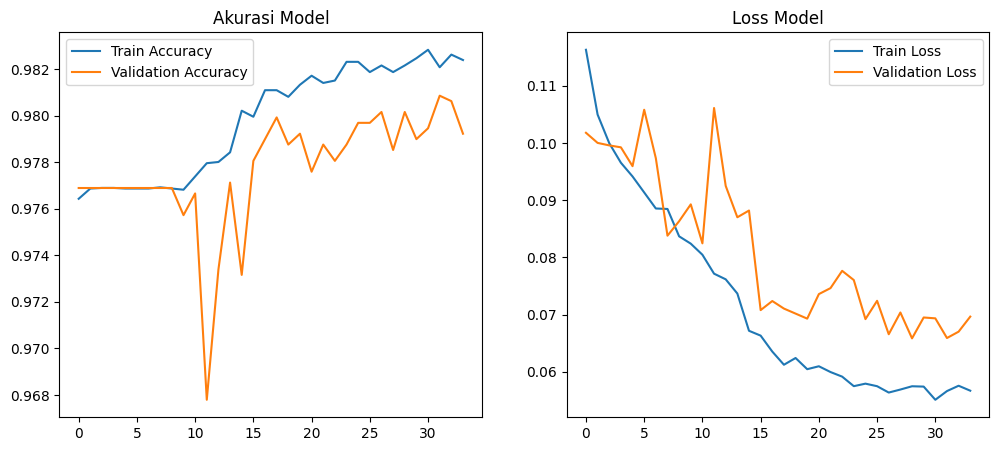

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Akurasi Model')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Model')
plt.show()

In [ ]:
model.save('simpsons_model.keras')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('simpsons_model.tflite', 'wb') as f:
    f.write(tflite_model)

tfjs.converters.save_keras_model(model, 'simpsons_model_tfjs')


Saved artifact at '/tmp/tmprv7lj31d'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  133584609319376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133584609323984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133584609324368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133584609323792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133584609322448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133584609322832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133584609323600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133584609325520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133584609325904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133584609324176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13358460932571

failed to lookup keras version from the file,
    this is likely a weight only file


# Simpan model dalam format .keras

In [ ]:
model.save("model_saved.keras")

# Simpan model dalam format SavedModel

In [ ]:
model_files = ["model_saved.h5", "model_saved.keras"]

model_path = None
for file in model_files:
    if os.path.exists(file):
        model_path = file
        break

if model_path:
    try:
        model = tf.keras.models.load_model(model_path)

        saved_model_dir = "saved_model"
        model.export(saved_model_dir)

        print(f"Model berhasil dikonversi dan disimpan di '{saved_model_dir}/'")
    except Exception as e:
        print(f"Terjadi kesalahan saat memuat atau menyimpan model: {e}")
else:
    print("File model tidak ditemukan. Pastikan ada file .h5 atau .keras dalam direktori.")


Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  133582176906768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133582176907536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133582176905232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133582176908112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133582176902736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133582176907344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133582176908496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133582176909840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133582176909264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133582176910416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133582176909072: Ten

# Simpan model dalam format TF-Lite

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

os.makedirs("tflite", exist_ok=True)
with open("tflite/model.tflite", "wb") as f:
    f.write(tflite_model)

print("Model berhasil dikonversi ke TFLite dan disimpan di 'tflite/model.tflite'")


Saved artifact at '/tmp/tmpg1lexd4f'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  133582176906768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133582176907536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133582176905232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133582176908112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133582176902736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133582176907344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133582176908496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133582176909840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133582176909264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133582176910416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133582176909072

# Simpan label ke file label.txt

In [ ]:
labels = ["Class1", "Class2", "Class3"]
with open("tflite/label.txt", "w") as f:
    f.write("\n".join(labels))

print("Label berhasil disimpan di 'tflite/label.txt'")


Label berhasil disimpan di 'tflite/label.txt'


# Simpan model dalam format TFJS

In [ ]:
tfjs.converters.save_keras_model(model, 'tfjs_model')
print("Model berhasil disimpan dalam format TFJS di 'tfjs_model/'")

# Buat file requirements.txt

In [ ]:
with open("requirements.txt", "w") as f:
    f.write("tensorflow==2.18.0\n")
    f.write("tensorflowjs==4.22.0\n")
    f.write("matplotlib==3.9.2\n")
    f.write("numpy==1.26.4\n")
print("File requirements.txt berhasil dibuat")